In [5]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [13]:
df=pd.read_csv('C:\\Users\\RANA ASIM\\Downloads\\archive (4)\\tested.csv',usecols=['Age','Fare','Survived'])
df.sample(5)

,Survived,Age,Fare
290,0,NaN,39.60
247,0,42.0,32.50
121,0,NaN,7.75
47,0,NaN,7.75
294,0,36.0,9.50


In [15]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [19]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [33]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [34]:
X=df.drop('Survived',axis=1)
y=df['Survived']
print('shape of X=',X.shape)
print('shape of y=',y.shape)

shape of X= (418, 2)
shape of y= (418,)


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print('sahpe of X_train',X_train.shape)
print('sahpe of y_train',y_train.shape)
print('sahpe of X_test',X_test.shape)
print('sahpe of y_test',y_test.shape)

sahpe of X_train (334, 2)
sahpe of y_train (334,)
sahpe of X_test (84, 2)
sahpe of y_test (84,)


C:\Users\RANA ASIM\AppData\Local\Temp\ipykernel_6264\3364785568.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ plot')

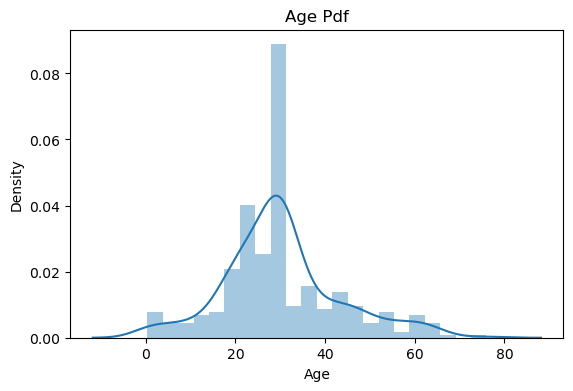

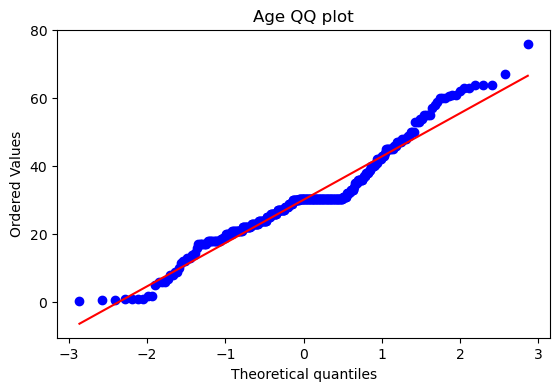

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Pdf')

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Age'],plot=plt)
plt.title('Age QQ plot')

C:\Users\RANA ASIM\AppData\Local\Temp\ipykernel_6264\2393147311.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

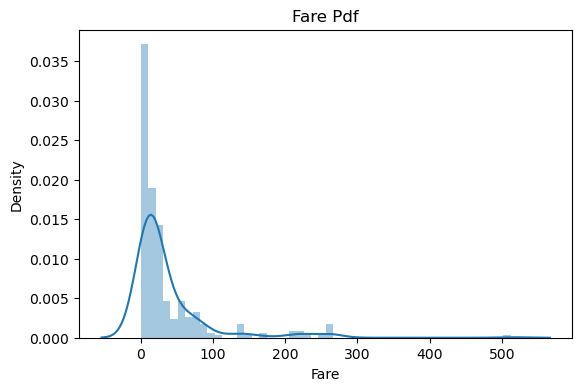

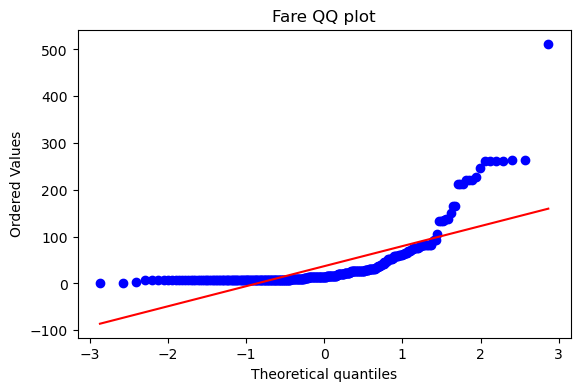

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Pdf')

plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(X_train['Fare'],plot=plt)
plt.title('Fare QQ plot')

In [38]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [39]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

y_pred=lr.predict(X_test)
y_pred1=dt.predict(X_test)

print('Accuracy score of LR', accuracy_score(y_test,y_pred))
print('Accuracy score of DT', accuracy_score(y_test,y_pred1))

Accuracy score of LR 0.6071428571428571
Accuracy score of DT 0.5595238095238095


In [40]:
trf=FunctionTransformer(func=np.log1p)

In [42]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans=trf.transform(X_test)

In [43]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()

lr.fit(X_train_trans,y_train)
dt.fit(X_train_trans,y_train)

y_pred=lr.predict(X_test_trans)
y_pred1=dt.predict(X_test_trans)

print('Accuracy score of LR', accuracy_score(y_test,y_pred))
print('Accuracy score of DT', accuracy_score(y_test,y_pred1))

Accuracy score of LR 0.6190476190476191
Accuracy score of DT 0.5476190476190477


In [45]:
X_transformed= trf.fit_transform(X)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
print('LR',np.mean(cross_val_score(lr,X_transformed,y,scoring='accuracy',cv=10)))
print('DT',np.mean(cross_val_score(dt,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.6028455284552846
